In [1]:
import tensorflow
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn
import matplotlib.pyplot as plt

#pd.options.display.max_rows = 1000

In [2]:
tensorflow.__version__

'2.10.0'

In [3]:
data = pd.read_csv(r"D:\Data Science Material\Deep Learning\ANN\aps_data.csv")
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [4]:
data.shape

(5000, 171)

In [5]:
data.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [6]:
data = data.replace("na", np.nan)

In [7]:
data.isna().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
          ... 
ee_007      58
ee_008      58
ee_009      58
ef_000     242
eg_000     242
Length: 171, dtype: int64

In [8]:
data.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [9]:
null_data = pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns=["Null_Count"])

In [10]:
null_data

,Null_Count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [11]:
for feature in [feature for feature in data.columns if feature not in ['class']]:
    data[feature] = data[feature].fillna(data[feature].median())

In [12]:
data.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [13]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [14]:
X = data.iloc[:,1:]
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,90,0,0,66,0,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,30,0.0,16,14,0,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,444,0.0,14,12,0,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,82,0.0,12,10,0,0,0,0,1464,4980,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,31394,0.0,0,136.0,0,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,1598,0.0,0,136.0,0,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,42,2,2130706454,56,0,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,32752,0.0,0,136.0,0,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [15]:
y = data['class']
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
4995    neg
4996    neg
4997    neg
4998    neg
4999    neg
Name: class, Length: 5000, dtype: object

In [16]:
X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [17]:
y.unique()

array(['neg', 'pos'], dtype=object)

In [18]:
y = pd.get_dummies(y, drop_first=True, dtype=int)
y

,pos
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 170), (1000, 170), (4000, 1), (1000, 1))

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [22]:
classifier = Sequential()

In [23]:
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 170))
# input_dim means the input layer neurons as we have 170 features so we have taken 170 neurons in input layer
# unit = 10 in Dense means the first hidden layer with contain 10 neurons

classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation = 'relu'))
# unit = 10 in second dense means again 10 neurons in hidden layer 2.

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# In output layer unit = 1 means only one neuron

In [24]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = classifier.fit(X_train, y_train, batch_size=10, epochs=20, validation_split=0.25)

Epoch 1/20
300/300 [==============================] - 3s 6ms/step - loss: 0.3413 - accuracy: 0.9353 - val_loss: 0.0948 - val_accuracy: 0.9760
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0683 - accuracy: 0.9813 - val_loss: 0.0528 - val_accuracy: 0.9830
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9873 - val_loss: 0.0505 - val_accuracy: 0.9840
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9903 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0411 - val_accuracy: 0.9880
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9950 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 7/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0596 - val_accuracy: 0.9820
Epoch 

In [27]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
model.history['accuracy']

[0.9353333115577698,
 0.981333315372467,
 0.987333357334137,
 0.9903333187103271,
 0.9933333396911621,
 0.9950000047683716,
 0.9943333268165588,
 0.9950000047683716,
 0.9953333139419556,
 0.996999979019165,
 0.9983333349227905,
 0.9976666569709778,
 0.9956666827201843,
 0.9946666955947876,
 0.996999979019165,
 0.996999979019165,
 0.9976666569709778,
 0.9980000257492065,
 0.9956666827201843,
 0.9976666569709778]

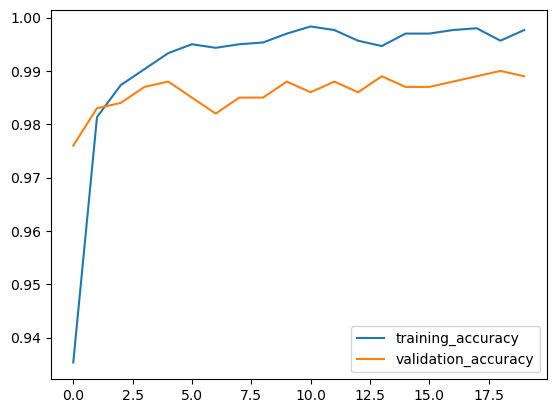

In [29]:
plt.plot(model.history['accuracy'], label = "training_accuracy")
plt.plot(model.history['val_accuracy'], label = "validation_accuracy")

plt.legend()

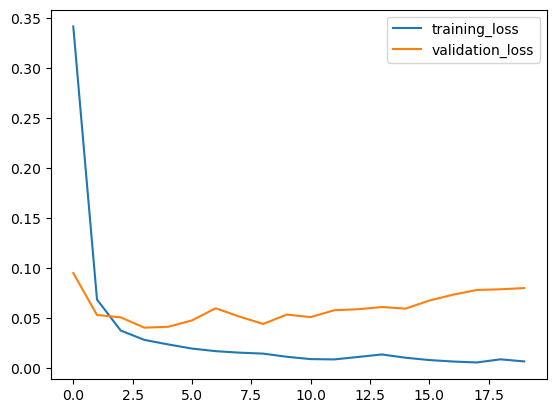

In [30]:
plt.plot(model.history['loss'], label = "training_loss")
plt.plot(model.history['val_loss'], label = "validation_loss")

plt.legend()

In [31]:
y_pred = classifier.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [32]:
y_pred = y_pred > 0.5

In [33]:
y_pred.shape

(1000, 1)

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[982   4]
 [  6   8]]


## Hyperparameter tuning ANN using keras tuner

In [35]:
from kerastuner.tuners import RandomSearch

In [36]:
def build_model(hyperparamter):
    model = Sequential()
    model.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 170))
    model.add(Dense(units = 32, kernel_initializer = 'he_uniform', activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))

    optimizers = hyperparamter.Choice("optimizer", values = ['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.compile(optimizer = optimizers, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [37]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory = "ANN", project_name = "ANN_practicals")
tuner.search(X_train, y_train, validation_data = (X_test, y_test), epochs= 5)

Reloading Tuner from ANN\ANN_practicals\tuner0.json


In [38]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [39]:
tuner.get_best_models(num_models=1)[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


## Hyperparameter for every parameter like neurons, optimizers, learning rate

In [40]:
from tensorflow.keras import optimizers

def build_model(hyperparamter):
    model = Sequential()
    for i in range(hyperparamter.Int("num_layers", 2, 20)):
        model.add(Dense(units = hyperparamter.Int('units_' + str(i), min_value = 32, max_value = 512, step = 32), activation = "relu"))
        model.add(Dense(units = 1, activation = "sigmoid"))

        model.compile(optimizer = optimizers.Adam(
            hyperparamter.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss = "binary_crossentropy", 
            metrics = ['accuracy'])
    return model
        

In [41]:
tuner_second = RandomSearch(build_model, objective = 'val_accuracy', directory = "ANN", project_name = "hyperparamter")
tuner_second.search(X_train, y_train, validation_data = (X_test, y_test), epochs= 5)

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.9860000014305115

Best val_accuracy So Far: 0.9860000014305115
Total elapsed time: 00h 02m 11s
